In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving BlackFriday.csv to BlackFriday.csv


In [0]:
!cp gdrive/My\ Drive/BlackFriday.csv . 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fancyimpute
from sklearn.impute import SimpleImputer
import sklearn
import seaborn as sns

In [9]:
inp = pd.read_csv('BlackFriday.csv')
print(inp.shape)

(537577, 12)


In [10]:
print(inp.isna().sum())
inp = inp.drop(columns = ['Product_Category_3'])
null_list = inp.columns[inp.isna().any()].tolist()
print(null_list)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64
['Product_Category_2']


In [0]:
for i in null_list:
     exec("inp.%s.fillna(inp.%s.value_counts().idxmax(),inplace=True)" %(i,i))

In [0]:
gender_dict = {'F':0, 'M':1}
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
city_dict = {'A':0, 'B':1, 'C':2}
stay_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}

In [0]:
inp["Gender"] = inp["Gender"].apply(lambda x: gender_dict[x])
inp["Age"] = inp["Age"].apply(lambda x: age_dict[x])
inp["City_Category"] = inp["City_Category"].apply(lambda x: city_dict[x])
inp["Stay_In_Current_City_Years"] = inp["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])

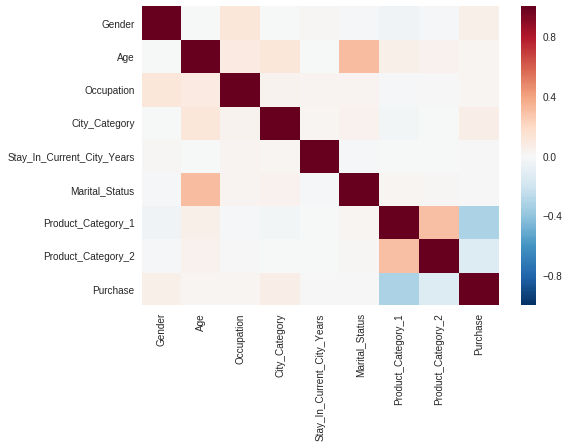

In [14]:
X_incomplete = inp.drop(columns = ['User_ID','Product_ID'])
x = X_incomplete.corr()
#print(x)
sns.heatmap(x)

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#inp['Product_Category']

In [0]:
X = inp.drop(['Purchase'],axis=1)
X.Product_Category_2
Y = inp['Purchase']

In [0]:
LE = LabelEncoder()
inp1=pd.read_csv('BlackFriday.csv')
X1 = inp1.drop(columns=['Purchase','Product_Category_3'])
for i in null_list:
     exec("X1.%s.fillna(X1.%s.value_counts().idxmax(),inplace=True)" %(i,i))
X1 = X1.apply(LE.fit_transform)


In [18]:
print(X1.head(50))

    User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0         0         670       0    0          10              0   
1         0        2374       0    0          10              0   
2         0         850       0    0          10              0   
3         0         826       0    0          10              0   
4         1        2732       1    6          16              2   
5         2        1829       1    2          15              0   
6         3        1743       1    4           7              1   
7         3        3318       1    4           7              1   
8         3        3596       1    4           7              1   
9         4        2629       1    2          20              0   
10        4        2396       1    2          20              0   
11        4         140       1    2          20              0   
12        4         307       1    2          20              0   
13        4        1353       1    2          20              

In [19]:
X = X.apply(LE.fit_transform)
print(X.head(50))

    User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0         0         670       0    0          10              0   
1         0        2374       0    0          10              0   
2         0         850       0    0          10              0   
3         0         826       0    0          10              0   
4         1        2732       1    6          16              2   
5         2        1829       1    2          15              0   
6         3        1743       1    4           7              1   
7         3        3318       1    4           7              1   
8         3        3596       1    4           7              1   
9         4        2629       1    2          20              0   
10        4        2396       1    2          20              0   
11        4         140       1    2          20              0   
12        4         307       1    2          20              0   
13        4        1353       1    2          20              

In [20]:
print(type(X.Occupation[0]))

<class 'numpy.int64'>


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


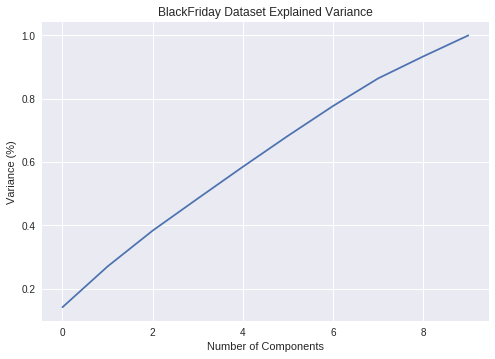

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

#scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = SS.fit_transform(X)
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('BlackFriday Dataset Explained Variance')
plt.show()

pca = PCA(n_components=8)
pca1 = PCA(n_components=8).fit(data_rescaled)
dataset = pca.fit_transform(data_rescaled)

#principalDf = pd.DataFrame(data = dataset, columns = ["component 1", "component 2", "component 3", "component 4","component 5","component 6","component 7"])
#principalDf



,Explained Variance,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
Dimension 1,0.1409,0.0836,0.0617,-0.0288,0.6130,0.1703,0.2280,-0.0116,0.5335,0.3612,0.3412
Dimension 2,0.2697,0.0718,0.0408,-0.2294,0.3388,-0.0691,-0.0185,-0.0572,0.2523,0.9513,0.9213
Dimension 3,0.3830,0.4468,-0.0906,-0.8241,0.4178,-0.6284,0.0379,-0.3491,0.4337,0.8263,0.7412
Dimension 4,0.4844,0.6707,-0.7838,-0.9089,0.3766,-0.5344,0.4496,0.1413,0.2625,0.8162,0.8517
Dimension 5,0.5847,0.1882,-0.4262,-1.2818,0.4101,-0.8069,0.6032,0.7671,0.3234,0.8147,0.7747
Dimension 6,0.6826,-0.3391,-1.0146,-1.3331,0.5123,-0.8574,0.0991,0.7269,0.6407,0.7671,0.7373
Dimension 7,0.7769,0.1997,-0.9028,-1.2675,0.5456,-0.8392,-0.5179,1.2482,0.8236,0.7697,0.6630
Dimension 8,0.8642,0.1981,-0.8504,-1.9335,0.5465,-0.1376,-0.6643,1.1648,0.6697,0.7839,0.5667


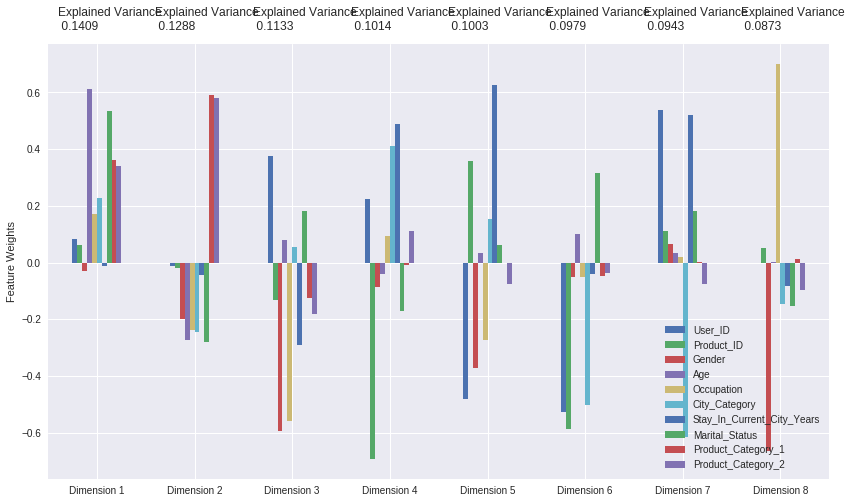

In [22]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    label=['User_ID','Product_ID','Gender',	'Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2']
    components = pd.DataFrame(np.round(pca.components_, 4),columns=label) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data_rescaled, pca1)

pca_results.cumsum()




#pca=PCA(n_components=3) 
#pca.fit(X_scaled) 
#X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
#principalDf.shape


In [0]:
 #########  FEATURE SELECTION XGBOOST  ##################

In [23]:
from sklearn.model_selection import KFold
kf = KFold(20)

#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
for a,b in kf.split(dataset):
    X_train, X_test = data_rescaled[a],data_rescaled[b]
    y_train, y_test = Y[a],Y[b]
    
    #print(a)
    #print(b)
print(X_train.shape)

(510699, 10)


In [24]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.3,
                max_depth = 7, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


#import xgboost as xgb
#from sklearn.metrics import mean_squared_error

#xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.3,
                #max_depth = 7, alpha = 10, n_estimators = 10)
#xg_reg.fit(X_train,y_train)

#preds = xg_reg.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))

RMSE: 2889.002330


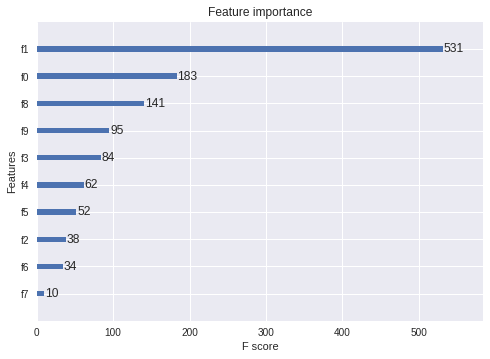

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 15]
plt.show()

In [26]:
#top features: Userid, ProductId,PC1
#print(X)

new_X = X.copy()
new_X = new_X.drop(columns=['Gender','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Age','Product_Category_2'])
new_X.head(5)

,User_ID,Product_ID,Product_Category_1
0,0,670,2
1,0,2374,0
2,0,850,11
3,0,826,11
4,1,2732,7


In [27]:
new_data_rescaled = SS.fit_transform(new_X)
for a,b in kf.split(dataset):
    new_X_train, new_X_test = new_data_rescaled[a],new_data_rescaled[b]
    new_y_train, new_y_test = Y[a],Y[b]
    
    #print(a)
    #print(b)
print(new_X_train.shape)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(510699, 3)


In [0]:
 ##########CLASSIFIER 1 - XGBOOST ###################

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[250,500,1000],'learning_rate':[0.1],'max_depth':[2,4,6],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=20)

In [0]:
def plot_reg(y_test,pred):
  plt.rc('xtick', labelsize=30) 
  plt.rc('ytick', labelsize=30) 
  fig, ax = plt.subplots(figsize=(8, 6))
  plt.style.use('ggplot')
  plt.plot(pred, y_test, 'ro')
  plt.xlabel('Predicted Price', fontsize = 30)
  plt.ylabel('Actual Price', fontsize = 30)
  plt.title('Predicted Price to the Actual Price', fontsize = 30)
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
  plt.show()
  


In [29]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1, learning_rate = 0.1,
                max_depth = 8, n_estimators = 1000)
xg_reg.fit(new_X_train,new_y_train)

preds = xg_reg.predict(new_X_test)
rmse = np.sqrt(mean_squared_error(new_y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2563.161304


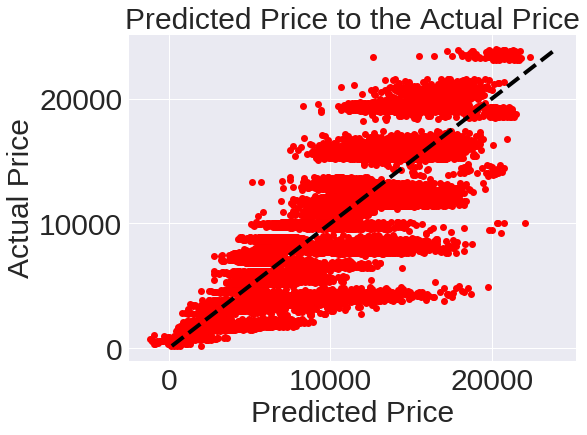

In [30]:
import matplotlib.pyplot as plt
plot_reg(new_y_test,preds)

In [0]:
############CLASSIFIER 2 -GRADIENT BOOST REGRESSOR ################

In [53]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[250,500,1000],'learning_rate':[0.1],'max_depth':[2,4,6],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=20)

In [0]:
search.fit(new_X_train,new_y_train)
search.best_params_
# get n_estimators: 1000 learning_rate : 0.1 max_depth:6,random_state : 1

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
new_gbr = GradientBoostingRegressor(max_depth=6,learning_rate=0.1,n_estimators=1000)
new_fit_gbr = new_gbr.fit(new_X_train,new_y_train)
new_gb_predict = new_fit_gbr.predict(new_X_test)
new_gb_msr = mean_squared_error(new_gb_predict,new_y_test)
print(np.sqrt(new_gb_msr))


2608.290314932097


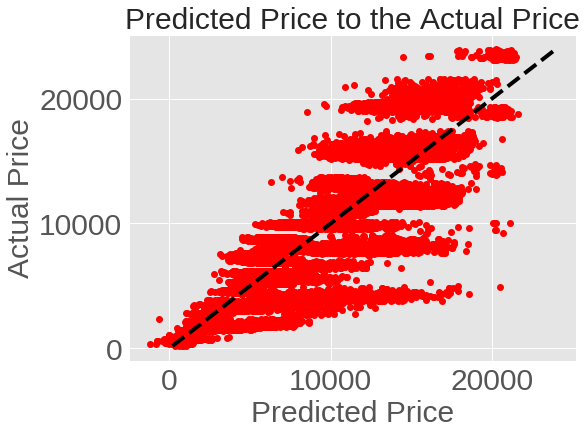

In [32]:
import matplotlib.pyplot as plt
plot_reg(new_y_test,new_gb_predict)

In [0]:
#######CLASSIFIER 3 RANDOM FOREST REGRESSOR ############

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [50, 80]
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
grid_search.fit(new_X_train, new_y_train)
grid_search.best_params_

In [33]:
from sklearn.ensemble import RandomForestRegressor
new_rfr = RandomForestRegressor(max_depth = 30, max_features="auto",min_samples_leaf=80,min_samples_split=8,n_estimators=1000,n_jobs=1)
new_fit_rfr = new_rfr.fit(new_X_train,new_y_train)
new_rf_predict = new_fit_rfr.predict(new_X_test)
new_rf_msr = np.sqrt(mean_squared_error(new_rf_predict,new_y_test))
print("RMSE: %f" % (new_rf_msr))

RMSE: 2745.693516


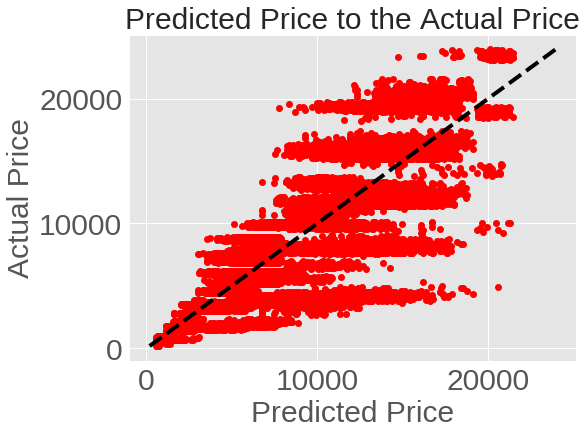

In [34]:
import matplotlib.pyplot as plt
plot_reg(new_y_test,new_rf_predict)

In [0]:
############## CLASSIFIER -4 NEURAL NETWORK###########

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [0]:
#def baseline_model():
model = Sequential()
model.add(Dense(32,input_dim=10,kernel_initializer = 'normal',activation = 'relu'))
model.add(Dense(18, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(1,kernel_initializer = 'normal'))
model.compile(loss='mean_squared_error',optimizer ='adam')
model.fit(new_X_train, new_y_train, batch_size=32, epochs=50, verbose=0, validation_split=.2)
  #return model


In [0]:
#predictor = model.predict(X_test
new_predictor = new_model.predict(new_X_test)
#print(new_predictor)
nn_ms = mean_squared_error(new_predictor,new_y_test)
print(np.sqrt(nn_ms))
